In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
n_samples = 500
n_cls = 2
mu1 = np.array([0, 0])
mu2 = np.array([8, 6])
mu3 = np.array([-1, 8])

X,y = make_blobs( 
        n_samples=n_samples,
        centers=[mu1, mu2, mu3],  
        cluster_std=[1, 2, 1.5]
    )

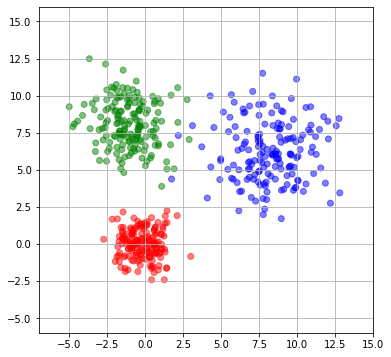

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.xlim(-7, 15)
plt.ylim(-6, 16)
plt.scatter(X[:,0], X[:,1], c = [['r','b','g','y'][j] for j in y], alpha=0.5 )   
plt.grid()
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, )

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((250, 2), (250,), (250, 2), (250,))

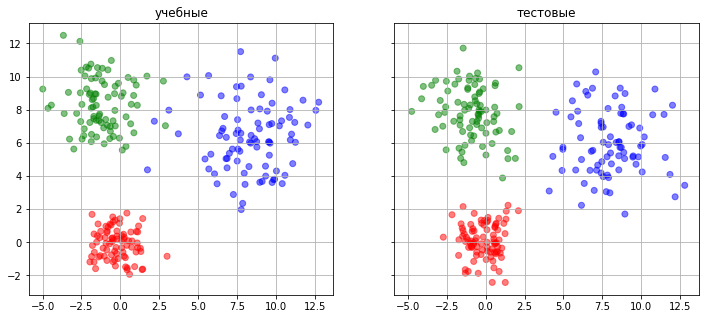

In [46]:
def plot_data(ax,X,y,t, marker='o'):
    c = [ ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'darkorange', 'violet'][j] for j in y  ]
    ax.set_title(t)
    ax.scatter( x=X[:,0], y=X[:,1], c=c,  alpha=0.5, marker=marker )
    ax.grid()

fig, (ax0,ax1) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,5),)
plot_data(ax0,X_train,y_train,'учебные')    
plot_data(ax1,X_test,y_test,'тестовые')    
plt.show()

In [47]:
model = KMeans(3).fit(X_train)
y_pred = model.predict(X_test)

In [48]:
from sklearn.metrics import silhouette_score

Данная величина лежит в диапазоне $[-1, 1]$. Значения, близкие к -1, соответствуют плохим (разрозненным) кластеризациям, значения, близкие к нулю, говорят о том, что кластеры пересекаются и накладываются друг на друга, значения, близкие к 1, соответствуют "плотным" четко выделенным кластерам. 

In [49]:
print(silhouette_score(X_test, y_pred))

0.6784607317288751


In [50]:
xlim = (-6, 13)
ylim = (-4, 15)
dist = 0.25
x2, y2 = np.meshgrid(np.linspace(xlim[0], xlim[1], round(xlim[1] - xlim[0] / dist)), np.linspace(ylim[0], ylim[1], round(ylim[1] - ylim[0] / dist)))
X_grid = np.hstack([x2.reshape(-1, 1), y2.reshape(-1, 1)])
# y_grid = model.predict(X_grid)

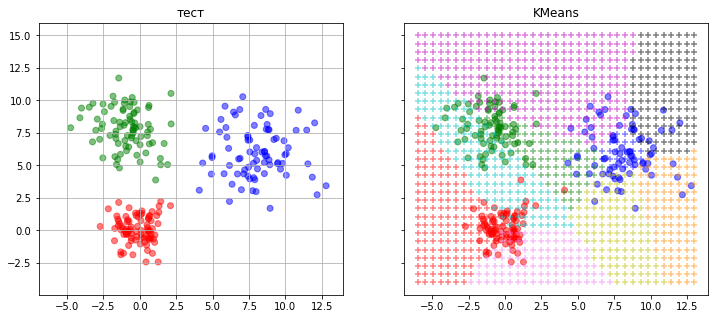

In [51]:
fig, (ax0,ax1) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,5),)
plot_data(ax0,X_test,y_test,'тест')    
plot_data(ax1,X_test,y_pred,'KMeans')    
plot_data(ax1,X_grid,y_grid,'KMeans', marker='+')    
plt.show()

In [52]:
def kmeans(n_clusters, X_train, X_test, X_grid):
    model = KMeans(n_clusters).fit(X_train)
    y_pred = model.predict(X_test)
    y_grid = model.predict(X_grid)
    score = silhouette_score(X_test, y_pred)
    return y_pred, score, y_grid

In [53]:
y_pred, score, y_grid = kmeans(3, X_train, X_test, X_grid)

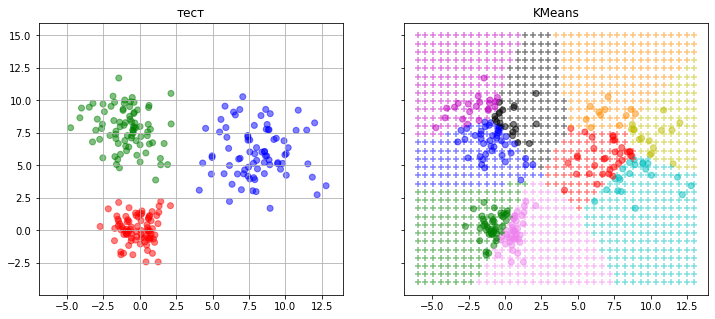

In [57]:
fig, axes = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,5),)
plot_data(axes[0], X_test, y_test, 'тест')    
plot_data(axes[1], X_test, y_pred, 'KMeans')    
plot_data(axes[1], X_grid, y_grid, 'KMeans', marker='+')    
plt.show()

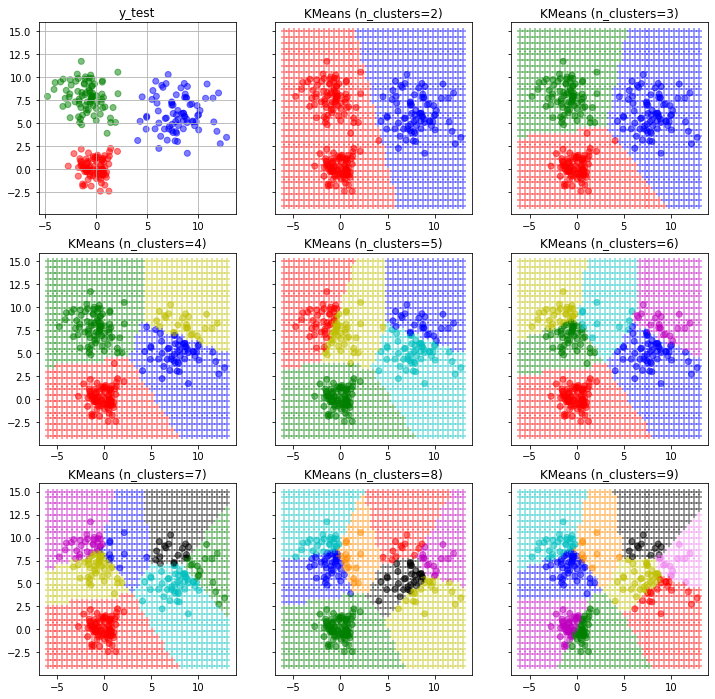

In [60]:
fig, axes = plt.subplots(3, 3, sharey=True, figsize=(12, 12))
plot_data(axes[0][0], X_test, y_test, 'y_test')    
scores = []
ns = range(2, 10)
for n in ns:
    y_pred, score, y_grid = kmeans(n, X_train, X_test, X_grid)
    plot_data(axes[(n-1)//3][(n-1)%3], X_test, y_pred, '')    
    plot_data(axes[(n-1)//3][(n-1)%3], X_grid, y_grid, 'KMeans (n_clusters=' + str(n) + ')', marker='+') 
    scores.append(score)

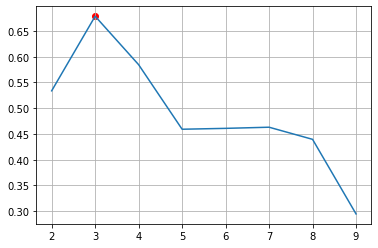

In [61]:
plt.plot(ns, scores)
plt.grid()
plt.scatter(ns[np.argmax(scores)], max(scores), color='r')
plt.show()